In [4]:
cd PycharmProjects/QSAR_bioconcentration/

[WinError 3] The system cannot find the path specified: 'PycharmProjects/QSAR_bioconcentration/'
C:\Users\Wiktor\PycharmProjects\QSAR_bioconcentration


In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from preprocess import Dataset

In [17]:
path = 'data/Grisoni_et_al_2016_EnvInt88.csv'
data = Dataset(path)

In [18]:
data.dataset

,CAS,SMILES,Set,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O],Class,logBCF
0,100-02-7,O=[N+](c1ccc(cc1)O)[O-],Train,0,0.000,1.49,0.14,1.35,0.72,0,1,5,1,0.74
1,100-17-4,O=[N+](c1ccc(cc1)OC)[O-],Train,0,0.000,1.47,0.14,1.70,0.88,0,1,5,1,0.93
2,100-18-5,c1cc(ccc1C(C)C)C(C)C,Train,0,0.000,1.20,0.25,4.14,2.06,0,0,0,3,3.24
3,100-25-4,O=[N+]([O-])c1ccc(cc1)[N+](=O)[O-],Train,0,0.000,1.69,0.13,1.89,0.79,0,1,8,3,-0.40
4,100-40-3,C=CC1CCC=CC1,Train,0,0.000,0.52,0.25,2.65,1.31,0,0,0,1,2.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,99-30-9,O=[N+]([O-])c1cc(c(N)c(c1)Cl)Cl,Train,2,0.000,1.48,0.17,2.57,0.73,0,1,4,1,1.88
775,99387-89-0,FC(F)(F)c2cc(ccc2(N=C(n1cncc1)COCCC))Cl,Test,1,6.564,2.37,0.16,3.77,2.28,0,1,3,2,2.59
776,99-65-0,O=[N+]([O-])c1cccc(c1)[N+](=O)[O-],Train,0,0.000,1.71,0.13,1.89,0.79,0,1,8,1,0.77
777,99-71-8,CC(c1ccc(cc1)O)CC,Test,0,0.000,1.19,0.21,2.81,1.69,0,0,1,3,1.35


Class 1: Compund mainly stored within lipid tissue

Class 2: Compound has additional storage sites (e.g. plasma proteins)

Class 3: Compound is metabolised or eliminated, bioconcentration reduced

In [19]:
data.dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CAS       779 non-null    object 
 1   SMILES    779 non-null    object 
 2   Set       779 non-null    object 
 3   nHM       779 non-null    int64  
 4   piPC09    779 non-null    float64
 5   PCD       779 non-null    float64
 6   X2Av      779 non-null    float64
 7   MLOGP     779 non-null    float64
 8   ON1V      779 non-null    float64
 9   N-072     779 non-null    int64  
 10  B02[C-N]  779 non-null    int64  
 11  F04[C-O]  779 non-null    int64  
 12  Class     779 non-null    int64  
 13  logBCF    779 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory usage: 85.3+ KB


There are no missing data in the dataset

In [20]:
data.dataset.describe()

,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O],Class,logBCF
count,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000
mean,1.754814,3.467616,1.550822,0.236881,3.201746,1.510295,0.186136,0.423620,3.585366,1.736842,2.062773
std,1.985866,2.983778,0.958708,0.149319,1.595702,0.834753,0.501937,0.494449,4.430421,0.921782,1.351290
min,0.000000,0.000000,0.000000,0.090000,-1.960000,0.080000,0.000000,0.000000,0.000000,1.000000,-1.700000
25%,0.000000,0.000000,1.210000,0.170000,2.190000,0.910000,0.000000,0.000000,0.000000,1.000000,0.985000
50%,1.000000,4.263000,1.400000,0.200000,3.130000,1.270000,0.000000,0.000000,2.000000,1.000000,2.030000
75%,3.000000,6.250000,2.285000,0.240000,4.235000,2.020000,0.000000,1.000000,6.000000,3.000000,2.950000
max,12.000000,9.316000,5.900000,2.230000,8.320000,7.190000,3.000000,1.000000,25.000000,3.000000,6.060000


In [21]:
for col in data.dataset.columns:
  if data.dataset[col].dtype == 'int64' and col != 'Class':
    print(f'{data.dataset[col].value_counts()}\n\n')

0     291
1     146
2     116
3      76
4      71
5      37
6      23
7       8
8       7
10      3
12      1
Name: nHM, dtype: int64


0    672
1     70
2     36
3      1
Name: N-072, dtype: int64


0    449
1    330
Name: B02[C-N], dtype: int64


0     312
4      78
2      63
1      51
5      38
3      36
6      33
8      27
10     25
7      22
9      22
12     17
13     14
11     14
14      7
18      6
16      5
15      3
17      2
19      1
21      1
25      1
20      1
Name: F04[C-O], dtype: int64




Columns N-072 and B02[C-N] may be treated as categorical

## Class proportions

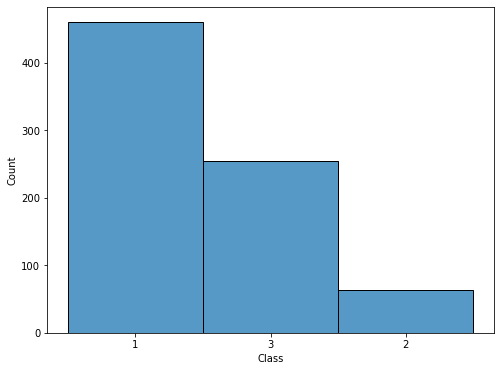

In [33]:
class_object = data.dataset['Class'].astype('str')
plt.figure(figsize=(8, 6))
sns.histplot(class_object)
plt.show()

The dataset is imbalanced in respect to classes proportions

## Correlation heatmap

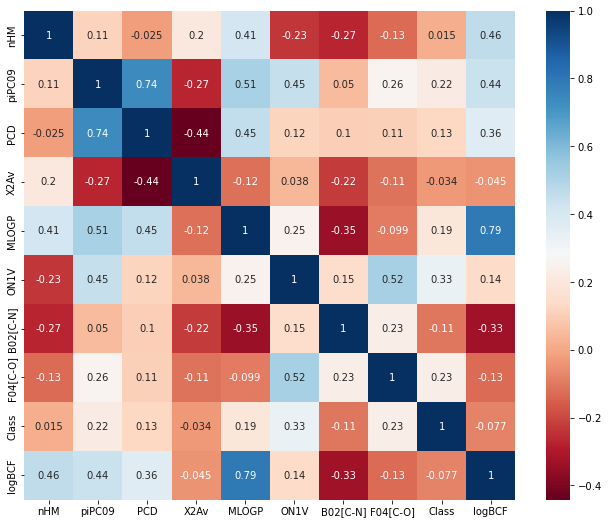

In [35]:
corr = data.dataset.corr()
plt.figure(figsize=(11, 9))
sns.heatmap(corr, cmap='RdBu', annot=True)
plt.show()

The correlation heatmap shows the most and the least informative features in relation to classes and logBCF

## Box plot

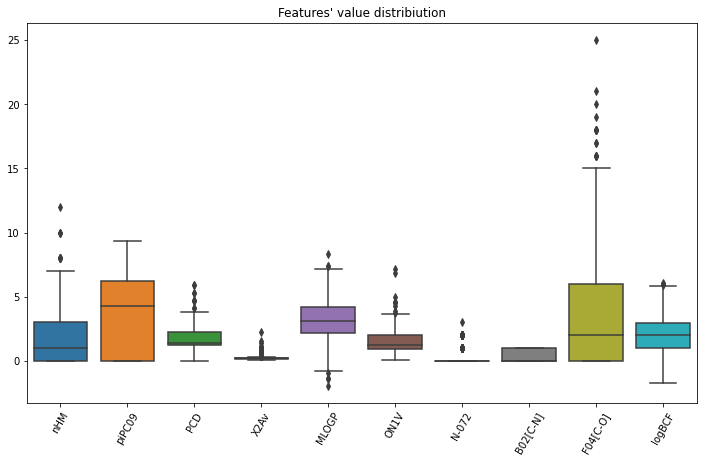

In [14]:
dataset['Class'] = dataset['Class'].astype(str)

plt.figure(figsize=(12, 7))
bp = sns.boxplot(data=dataset)
bp.xaxis.set_tick_params(rotation=60)
bp.set_title('Features\' value distribiution')
plt.show()

The box plot shows a number of outliers in most of the features